<a href="https://colab.research.google.com/github/syedghazihaider/LAB-assaingment-/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving cancer patient dataset - cancer patient dataset.csv to cancer patient dataset - cancer patient dataset.csv


In [ ]:
#filename = "cancer patient dataset - cancer patient dataset.csv"
df = pd.read_csv("cancer patient dataset - cancer patient dataset.csv")
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [ ]:
print(df.isnull().sum())




index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
y = df.Snoring.copy()
df.drop("Snoring", axis=1, inplace=True)
print(df.head())

   index  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0           0   33       1              2            4             5   
1      1           1   17       1              3            1             5   
2      2           2   35       1              4            5             6   
3      3           3   37       1              7            7             7   
4      4           4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  \
0                     4             3                     2  ...   
1                     3             4                     2  ...   
2                     5             5                     4  ...   
3                     7             6                     7  ...   
4                     7             7                     6  ...   

   Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0                  4        3          

In [ ]:
print(f"'{df.columns[-1]}'")  # Prints the exact last column name



'Snoring'


In [ ]:
y = y.astype('category')
y = y.cat.codes
print(y)

0      3
1      1
2      1
3      4
4      2
      ..
995    2
996    3
997    1
998    2
999    1
Length: 1000, dtype: int8


In [ ]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [ ]:
df.drop(columns=["Patient Id"], inplace=True)
df.drop(columns=["index"], inplace=True)
print(df.dtypes)


Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert all object (categorical) columns into numeric
df = df.apply(lambda col: le.fit_transform(col) if col.dtype == "object" else col)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")



KNN Accuracy: 0.99


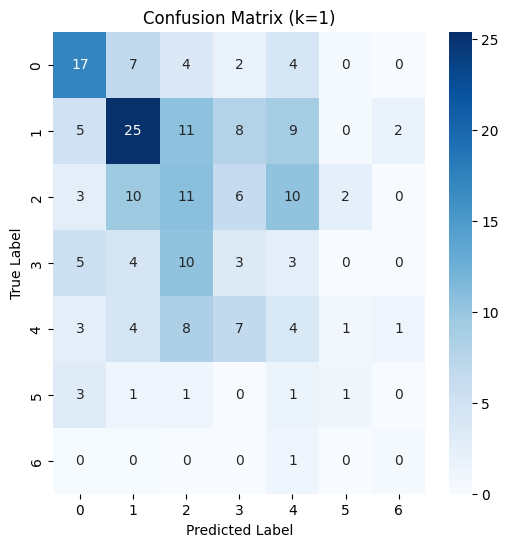

K=1 | Avg Accuracy: 0.3100, Avg Precision: 0.3310, Avg Recall: 0.3100


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

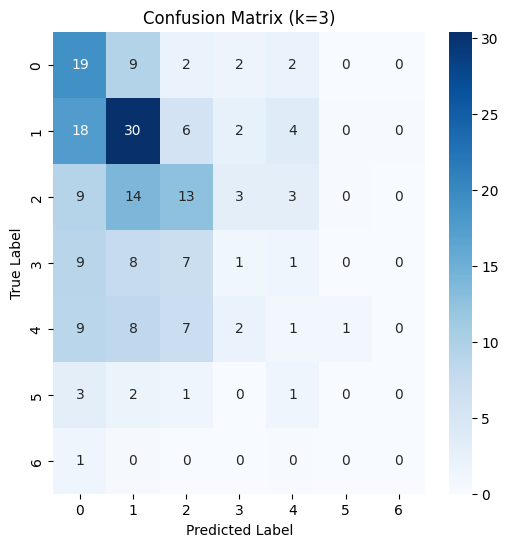

K=3 | Avg Accuracy: 0.3210, Avg Precision: 0.2814, Avg Recall: 0.3210


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

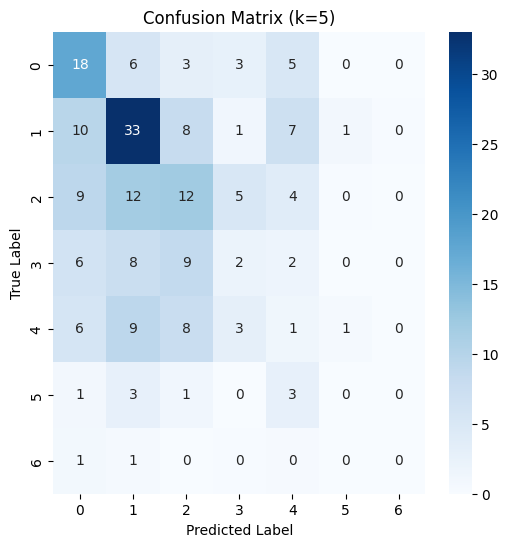

K=5 | Avg Accuracy: 0.3300, Avg Precision: 0.2981, Avg Recall: 0.3300


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

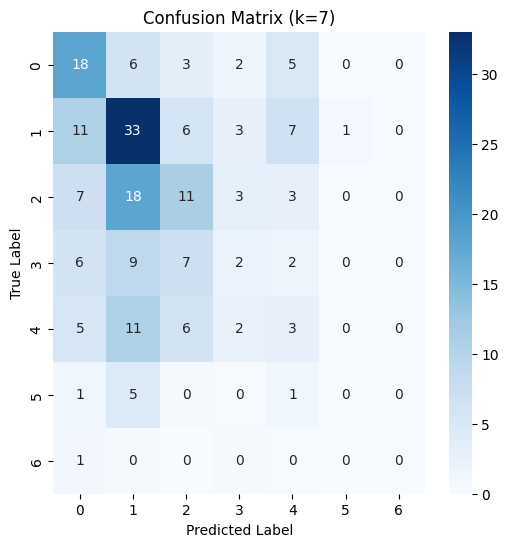

K=7 | Avg Accuracy: 0.3360, Avg Precision: 0.3006, Avg Recall: 0.3360


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

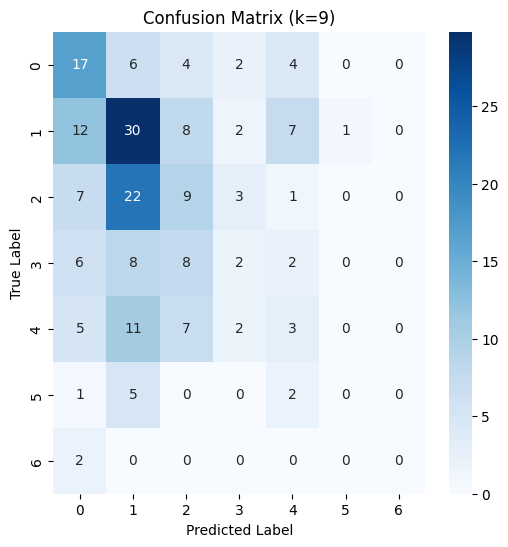

K=9 | Avg Accuracy: 0.3010, Avg Precision: 0.2713, Avg Recall: 0.3010


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

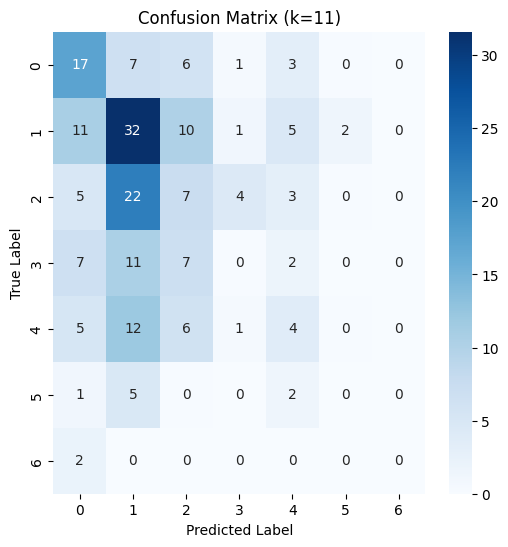

K=11 | Avg Accuracy: 0.3010, Avg Precision: 0.2519, Avg Recall: 0.3010

Comparison:
k=1: Accuracy=0.3100, Precision=0.3310, Recall=0.3100
k=3: Accuracy=0.3210, Precision=0.2814, Recall=0.3210
k=5: Accuracy=0.3300, Precision=0.2981, Recall=0.3300
k=7: Accuracy=0.3360, Precision=0.3006, Recall=0.3360
k=9: Accuracy=0.3010, Precision=0.2713, Recall=0.3010
k=11: Accuracy=0.3010, Precision=0.2519, Recall=0.3010


In [ ]:
# prompt: Plot CM, and show accuracy, precision, and recall.
# 3. Use K-Fold validation (5 splits)
# 4. Use different K-neighbors and show your results.
# 5. Analyze small and large K-neighbors and compare their results.

import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for data loading and preprocessing)

# Updated K-Fold Cross Validation and K-neighbors analysis
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = [1, 3, 5, 7, 9, 11]  # Different K-neighbors to test
results = []

for k in k_values:
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    cm_list = []

    for train_index, test_index in kf.split(df):
        X_train_fold, X_test_fold = df.iloc[train_index], df.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)
        y_pred_fold = knn.predict(X_test_fold)

        accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
        precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
        recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))

        cm_list.append(confusion_matrix(y_test_fold, y_pred_fold))

    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)

    # Average confusion matrix (optional, but insightful)
    avg_cm = sum(cm_list) / len(cm_list)

    results.append({
        'k': k,
        'accuracy': avg_accuracy,
        'precision': avg_precision,
        'recall': avg_recall,
        'cm': avg_cm
    })

    # Confusion Matrix Plot for current k
    plt.figure(figsize=(6, 6))
    sns.heatmap(avg_cm, annot=True, fmt=".0f", cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"K={k} | Avg Accuracy: {avg_accuracy:.4f}, Avg Precision: {avg_precision:.4f}, Avg Recall: {avg_recall:.4f}")

# Analyze and compare results (you can add more detailed analysis here)
print("\nComparison:")
for res in results:
  print(f"k={res['k']}: Accuracy={res['accuracy']:.4f}, Precision={res['precision']:.4f}, Recall={res['recall']:.4f}")
